# CS492F 전산학특강<인공지능 산업 및 스마트에너지>
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

### 3-7. Practice: CIFAR10

In this notebook, you are going to train convolutional neural networks in two ways:
- From the scratch
- From the pre-trained network 

Please follow the steps below to continue this practice.

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# DO NOT EDIT THE FOLLOWING LINES
# THESE LINES ARE FOR REPRODUCIBILITY
np.random.seed(1)
tf.random.set_seed(1)

### 1. Load the CIFAR10 dataset
In this notebook, you will use the CIFAR10 dataset which contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

![CIFAR10](images/cifar10.png)

In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

`cifar10.load_data()` returns four NumPy arrays:

- The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
- The model should be tested against the test set, the `test_images`, and `test_labels` arrays.

The images are 32x32 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label |    Class   |
|-------|------------|
|   0   | Airplane   |
|   1   | Automobile |
|   2   | Bird       |
|   3   | Cat        |
|   4   | Deer       |
|   5   | Dog        |
|   6   | Frog       |
|   7   | Horse      |
|   8   | Ship       |
|   9   | Truck      |

Each image is mapped to a single label. Since the class names are not included with the dataset, let's store them here to use later when plotting the images:

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 2. Preprocess the data
To preprocess the dataset, let's make `tf.data.Dataset` using `(train_images, train_labels)` and `(test_images, test_labels)`

In [13]:
train_tensors = tf.data.Dataset.from_tensor_slices((train_images, tf.squeeze(train_labels)))
test_tensors = tf.data.Dataset.from_tensor_slices((test_images, tf.squeeze(test_labels)))

#### Problem 1
Preprocess the data you have loaded as follows:
- Resize images to `(image_height, image_width)`
- Scale values to a range of `[-1, 1]`

In [14]:
image_height, image_width = 224, 224

# TODO: Preprocess the data you have loaded
### START CODE HERE ###
def preprocess_example(image, label):
    image = tf.image.resize(image, (image_height, image_width))
    image = (image / 127.5) - 1
    return image, label

train_tensors = train_tensors.map(preprocess_example)
test_tensors = test_tensors.map(preprocess_example)
### END CODE HERE ###

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

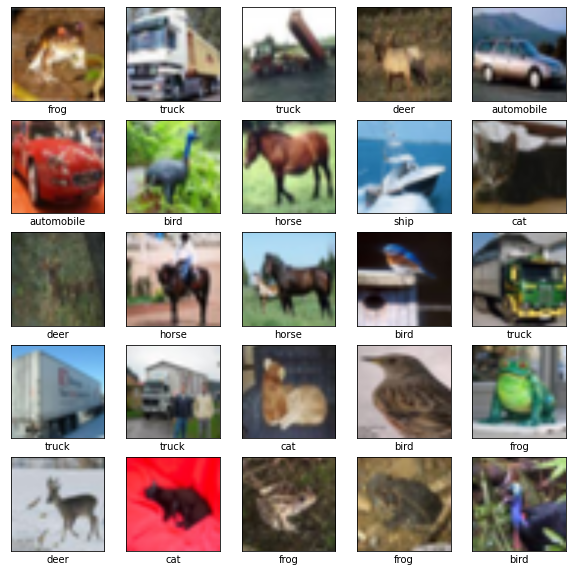

In [18]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(train_tensors.take(25)):
    plt.subplot(5, 5, index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((image + 1) / 2, cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[label])
plt.show()

Then, let's combine elements of train and test datasets into batches.

In [19]:
train_tensors = train_tensors.batch(32)
test_tensors = test_tensors.batch(32)

### 3. Build the model
First, you are going to build a convolutional neural network that will be trained from the scratch.

#### Problem 2
Define a convolutional neural network here using `tf.keras.Sequential`.

In [29]:
# TODO: Define a convolutional neural network to classify CIFAR10 dataset
model_from_scratch = tf.keras.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
    ### END CODE HERE ###
])

#### Problem 3
Load `DenseNet121` model without the top classification layer using `tf.keras.applications.DenseNet121`. Then, freeze the model to prevent it from being trained.

In [30]:
# TODO: Load DenseNet121 model without the top classification layer
#       Then, freeze the model to prevent it from being trained
### START CODE HERE ###
densenet121 = tf.keras.applications.DenseNet121(input_shape=(image_height, image_width, 3), include_top=False, weights='imagenet')
densenet121.trainable = False
### END CODE HERE ###

Define a convolutional neural network using the loaded `DenseNet121` to classify images.

In [31]:
# TODO: Define a convolutional neural network using the loaded DenseNet121
### START CODE HERE ###
model_transferred = tf.keras.Sequential([
    densenet121,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax'),
])
### END CODE HERE ###

#### Problem 4
Compile both models you have defined with appropriate optimizers, loss functions and metrics.

In [32]:
# TODO: Compile `model_from_scratch` with appropriate parameters
### START CODE HERE ###
model_from_scratch.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
### END CODE HERE ###

In [33]:
# TODO: Compile `model_transferred` with appropriate parameters
### START CODE HERE ###
model_transferred.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
### END CODE HERE ###

### 4. Train the model
#### Problem 5
Train both models at least 10 epochs using the training data.

In [34]:
# TODO: Train `model_from_scratch` at least 5 epochs using the training data
### START CODE HERE ###
model_from_scratch.fit(
    train_tensors,
    epochs=5,
    validation_data=test_tensors,
)
### END CODE HERE ###

Train for 1563 steps, validate for 313 steps
Epoch 1/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4394 - accuracy: 0.4870 - val_loss: 1.2067 - val_accuracy: 0.5706
Epoch 2/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0618 - accuracy: 0.6255 - val_loss: 1.0862 - val_accuracy: 0.6210
Epoch 3/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8211 - accuracy: 0.7135 - val_loss: 1.1820 - val_accuracy: 0.6214
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6167 - accuracy: 0.7858 - val_loss: 1.4471 - val_accuracy: 0.6080
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4674 - accuracy: 0.8361 - val_loss: 1.7034 - val_accuracy: 0.5905


In [ ]:
# TODO: Train `model_transferred` at least 5 epochs using the training data
### START CODE HERE ###
model_transferred.fit(
    train_tensors,
    epochs=5,
    validation_data=test_tensors,
)
### END CODE HERE ###

Train for 1563 steps, validate for 313 steps
Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4781 - accuracy: 0.5061 - val_loss: 1.1711 - val_accuracy: 0.5991
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8768 - accuracy: 0.7241 - val_loss: 0.9029 - val_accuracy: 0.6962
Epoch 3/5
1562/1563 [============================>.] - ETA: 0s - loss: 0.7425 - accuracy: 0.7601

### 5. Evaluate accuracy
#### Problem 6
Evaluate the trained models using test dataset and print the test accuracy of the model.

In [21]:
# TODO: Evaluate the model using test dataset
### START CODE HERE ###
print('From scratch:', model_from_scratch.evaluate(test_images, test_labels, verbose=0))
print('Transferred:', model_transferred.evaluate(test_images, test_labels, verbose=0))
### END CODE HERE ###

From scratch: [0.9392837400436401, 0.6692]
Transferred: [1.750456921005249, 0.419]
